In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")
fake.shape

(23481, 4)

In [5]:
true.shape

(21417, 4)

In [7]:
fake['target'] = 'fake'
true['target'] = 'true'

In [9]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape


(44898, 5)

In [11]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)


In [13]:
data.head()

,title,text,subject,date,target
0,Trump Gets His Safe Space As Women’s Protest ...,Trump cannot handle dissent. He cannot handle ...,News,"December 9, 2016",fake
1,IRS EXEC LOIS LERNER DEMANDS SECRECY In Law Su...,This is rich! Lois Lerner wants her testimony ...,politics,"Apr 14, 2017",fake
2,Pentagon warns against impact of extending tem...,WASHINGTON (Reuters) - U.S. Secretary of Defen...,politicsNews,"November 29, 2016",true
3,US MEDIA THROWING OUT “Unmitigated Bullsh*t.” ...,Like we didn t know this already BUT now we ha...,politics,"Aug 15, 2016",fake
4,Hispanic Man Living In “Hood” Has BRUTAL Messa...,"It s easy to blame the White man that way, y...",left-news,"Aug 30, 2016",fake


In [15]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Trump Gets His Safe Space As Women’s Protest ...,Trump cannot handle dissent. He cannot handle ...,News,fake
1,IRS EXEC LOIS LERNER DEMANDS SECRECY In Law Su...,This is rich! Lois Lerner wants her testimony ...,politics,fake
2,Pentagon warns against impact of extending tem...,WASHINGTON (Reuters) - U.S. Secretary of Defen...,politicsNews,true
3,US MEDIA THROWING OUT “Unmitigated Bullsh*t.” ...,Like we didn t know this already BUT now we ha...,politics,fake
4,Hispanic Man Living In “Hood” Has BRUTAL Messa...,"It s easy to blame the White man that way, y...",left-news,fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


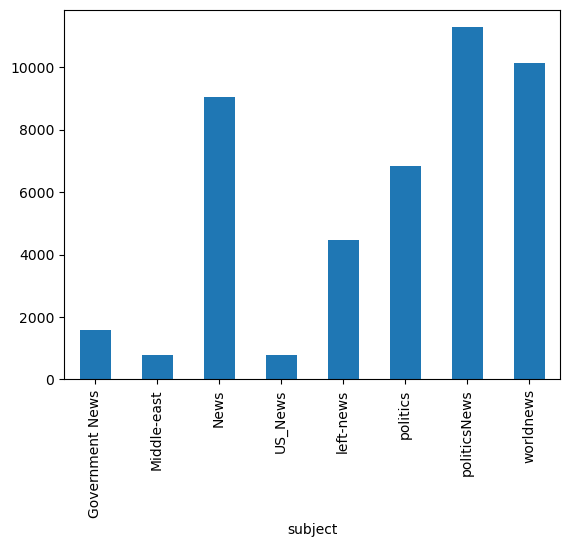

In [17]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()